In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


In [3]:
ticker = "SPXL"

# Download historical data for the stock
df = yf.download(ticker, start="2023-01-01", end="2024-06-27")



[*********************100%***********************]  1 of 1 completed


In [4]:
# Calculate daily returns
df['Daily Return'] = df['Adj Close'].pct_change()

# Drop the NaN values generated by the pct_change() function
df = df.dropna()

# Display the first few rows to check the new column
print(df.head())


                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2023-01-04  62.439999  63.750000  60.900002  62.709999  61.614235  17139400   
2023-01-05  61.689999  61.740002  60.250000  60.529999  59.472328  15680900   
2023-01-06  62.049999  65.220001  60.529999  64.639999  63.510509  18489900   
2023-01-09  65.800003  67.449997  64.440002  64.559998  63.431911  11824200   
2023-01-10  64.209999  65.919998  63.720001  65.879997  64.728851  11130700   

            Daily Return  
Date                      
2023-01-04      0.022001  
2023-01-05     -0.034763  
2023-01-06      0.067900  
2023-01-09     -0.001238  
2023-01-10      0.020446  


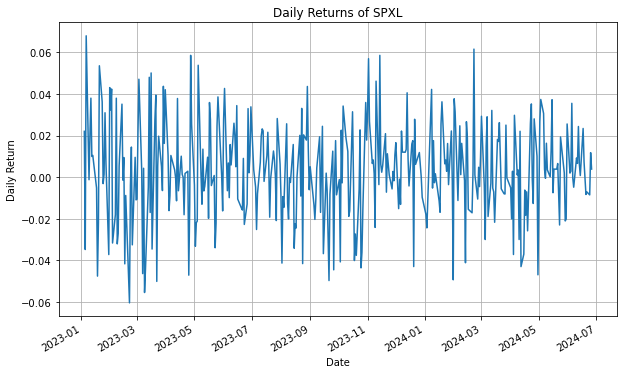

In [11]:
plt.figure(figsize=(10, 6))
df['Daily Return'].plot()
plt.title('Daily Returns of SPXL')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()


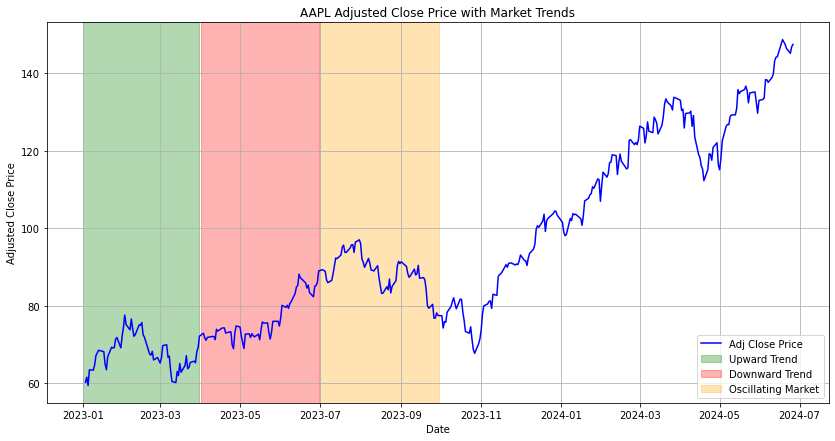

In [12]:
plt.figure(figsize=(14, 7))

# Plot the Adjusted Close price
plt.plot(df['Adj Close'], label='Adj Close Price', color='blue')

# Highlight the different market trend periods
plt.axvspan('2023-01-01', '2023-03-31', color='green', alpha=0.3, label='Upward Trend')
plt.axvspan('2023-04-01', '2023-06-30', color='red', alpha=0.3, label='Downward Trend')
plt.axvspan('2023-07-01', '2023-09-30', color='orange', alpha=0.3, label='Oscillating Market')

plt.title('AAPL Adjusted Close Price with Market Trends')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed
2023-01-03 00:00:00 2024-06-26 00:00:00
Upward Trend Performance: {'Mean Return': 0.003449581342260315, 'Standard Deviation': 0.031618567666935014, 'Total Return': 0.19740335620652205}
Downward Trend Performance: {'Mean Return': 0.003619845551193413, 'Standard Deviation': 0.021854244499491554, 'Total Return': 0.22038141311777992}
Oscillating Market Performance: {'Mean Return': -0.001984523873173487, 'Standard Deviation': 0.020368300381803716, 'Total Return': -0.13208971347128184}


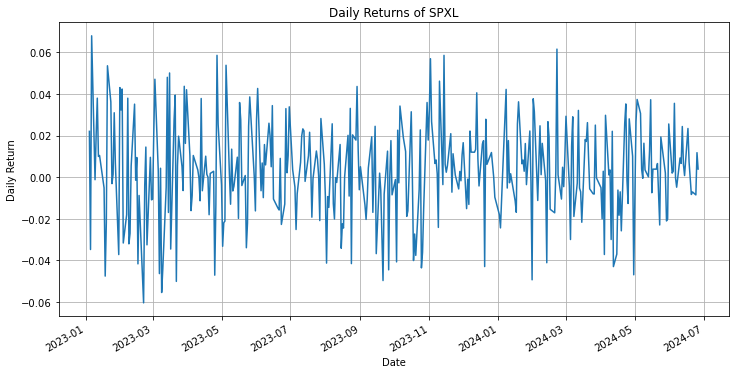


This graph shows the daily returns of SPXL over the specified period. Daily returns are calculated as the percentage change 
in the adjusted closing price from one day to the next. Positive returns indicate a gain, while negative returns indicate a loss.
The volatility of daily returns can provide insight into the stock's risk level.



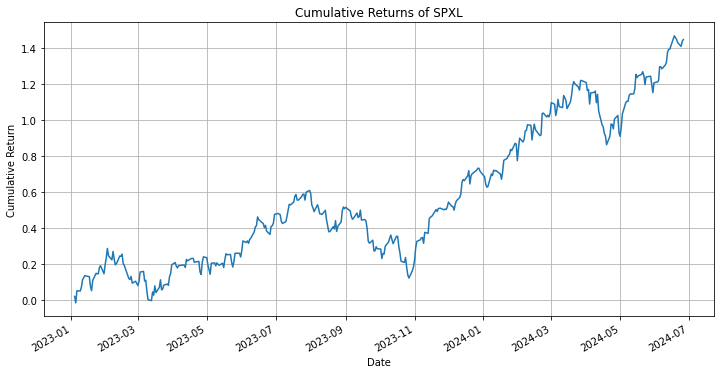


This graph shows the cumulative returns of SPXL over the specified period. Cumulative returns are calculated by compounding 
the daily returns. This measure reflects the total return of the stock over time, taking into account the compounding effect of daily gains and losses.



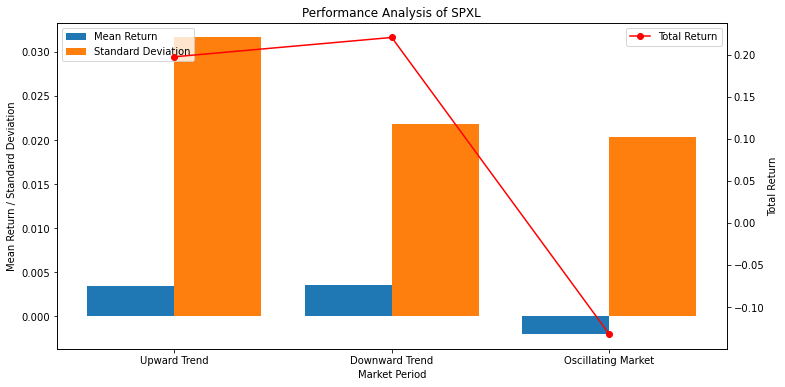


This graph provides a performance analysis of SPXL during different market periods: Upward Trend, Downward Trend, and Oscillating Market.
- The bars represent the mean return and standard deviation (risk) of daily returns for each period.
- The line plot shows the total return over each period, calculated as the cumulative product of daily returns.
This analysis helps in understanding how SPXL performs under different market conditions, highlighting its risk and return profile.



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Load data
ticker = "SPXL"

# Download historical data for the stock
df = yf.download(ticker, start="2023-01-01", end="2024-06-27")

# Ensure the 'Date' column is in datetime format and set it as the index
#df['Date'] = pd.to_datetime(df['Date'])
#df.set_index('Date', inplace=True)

# Calculate daily returns
df['Daily Return'] = df['Adj Close'].pct_change()

# Define market trend periods based on the actual date ranges in your data
# Modify these ranges to match the dates in your dataset

# Check the date range in your dataset
print(df.index.min(), df.index.max())

# Example: Upward Trend Period
upward_trend = df.loc['2023-01-01':'2023-03-31']

# Example: Downward Trend Period
downward_trend = df.loc['2023-04-01':'2023-06-30']

# Example: Oscillating Market Period
oscillating_market = df.loc['2023-07-01':'2023-09-30']

# Calculate statistics for each period with a check for non-empty DataFrame
def performance_analysis(period_df):
    if period_df.empty:
        return {
            'Mean Return': np.nan,
            'Standard Deviation': np.nan,
            'Total Return': np.nan
        }
    return {
        'Mean Return': period_df['Daily Return'].mean(),
        'Standard Deviation': period_df['Daily Return'].std(),
        'Total Return': (period_df['Adj Close'].iloc[-1] / period_df['Adj Close'].iloc[0]) - 1
    }

upward_performance = performance_analysis(upward_trend)
downward_performance = performance_analysis(downward_trend)
oscillating_performance = performance_analysis(oscillating_market)

# Print performance analysis results
print("Upward Trend Performance:", upward_performance)
print("Downward Trend Performance:", downward_performance)
print("Oscillating Market Performance:", oscillating_performance)

# Plot Daily Return
plt.figure(figsize=(12, 6))
df['Daily Return'].plot()
plt.title('Daily Returns of SPXL')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

# Explanation for Daily Returns graph
daily_returns_explanation = """
This graph shows the daily returns of SPXL over the specified period. Daily returns are calculated as the percentage change 
in the adjusted closing price from one day to the next. Positive returns indicate a gain, while negative returns indicate a loss.
The volatility of daily returns can provide insight into the stock's risk level.
"""

print(daily_returns_explanation)

# Plot Cumulative Returns
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod() - 1

plt.figure(figsize=(12, 6))
df['Cumulative Return'].plot()
plt.title('Cumulative Returns of SPXL')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

# Explanation for Cumulative Returns graph
cumulative_returns_explanation = """
This graph shows the cumulative returns of SPXL over the specified period. Cumulative returns are calculated by compounding 
the daily returns. This measure reflects the total return of the stock over time, taking into account the compounding effect of daily gains and losses.
"""

print(cumulative_returns_explanation)

# Plot Performance Analysis
periods = ['Upward Trend', 'Downward Trend', 'Oscillating Market']
mean_returns = [upward_performance['Mean Return'], downward_performance['Mean Return'], oscillating_performance['Mean Return']]
std_devs = [upward_performance['Standard Deviation'], downward_performance['Standard Deviation'], oscillating_performance['Standard Deviation']]
total_returns = [upward_performance['Total Return'], downward_performance['Total Return'], oscillating_performance['Total Return']]

x = np.arange(len(periods))

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(x - 0.2, mean_returns, 0.4, label='Mean Return')
ax1.bar(x + 0.2, std_devs, 0.4, label='Standard Deviation')
ax1.set_ylabel('Mean Return / Standard Deviation')
ax1.set_xlabel('Market Period')
ax1.set_title('Performance Analysis of SPXL')
ax1.set_xticks(x)
ax1.set_xticklabels(periods)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot(x, total_returns, color='red', marker='o', linestyle='-', label='Total Return')
ax2.set_ylabel('Total Return')
ax2.legend(loc='upper right')

plt.show()

# Explanation for Performance Analysis graph
performance_analysis_explanation = """
This graph provides a performance analysis of SPXL during different market periods: Upward Trend, Downward Trend, and Oscillating Market.
- The bars represent the mean return and standard deviation (risk) of daily returns for each period.
- The line plot shows the total return over each period, calculated as the cumulative product of daily returns.
This analysis helps in understanding how SPXL performs under different market conditions, highlighting its risk and return profile.
"""

print(performance_analysis_explanation)

[*********************100%***********************]  8 of 8 completed


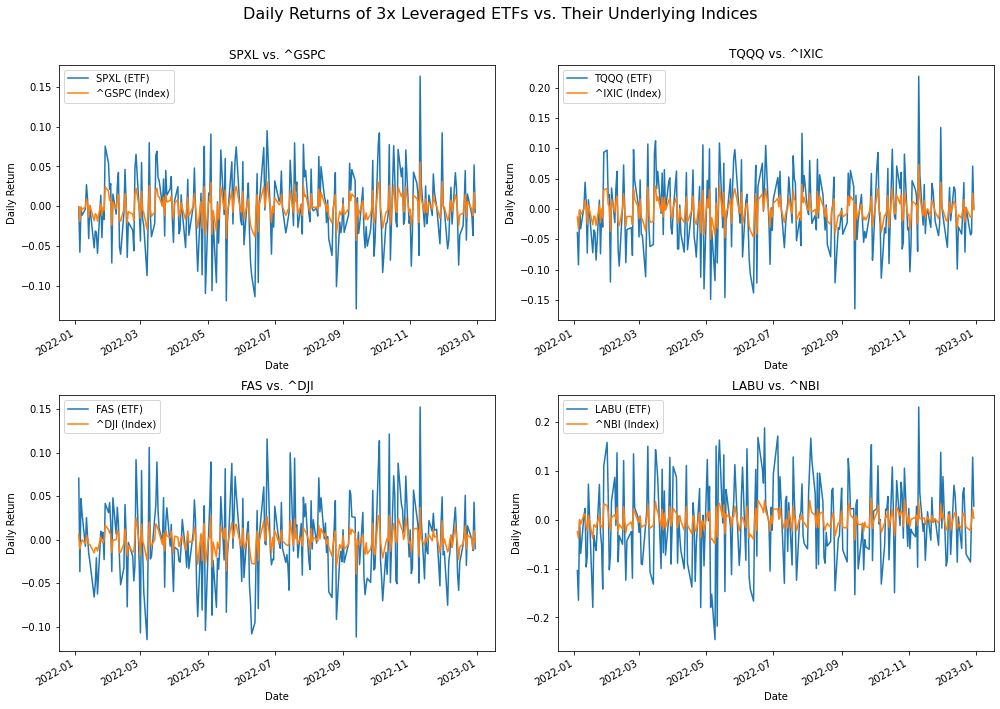

In [8]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ETFs and their underlying indices
etfs = ["SPXL", "TQQQ", "FAS", "LABU"]
indices = ["^GSPC", "^IXIC", "^DJI", "^NBI"]

# Fetch historical data for the ETFs and indices
data = yf.download(etfs + indices, start="2022-01-01", end="2023-01-01")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Split the returns into ETF returns and index returns
etf_returns = returns[etfs]
index_returns = returns[indices]

# Plot daily returns for each ETF and its corresponding index
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Daily Returns of 3x Leveraged ETFs vs. Their Underlying Indices', fontsize=16)

for i, ax in enumerate(axes.flatten()):
    etf = etfs[i]
    index = indices[i]
    etf_returns[etf].plot(ax=ax, label=f'{etf} (ETF)')
    index_returns[index].plot(ax=ax, label=f'{index} (Index)')
    ax.set_title(f'{etf} vs. {index}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Return')
    ax.legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


[*********************100%***********************]  8 of 8 completed


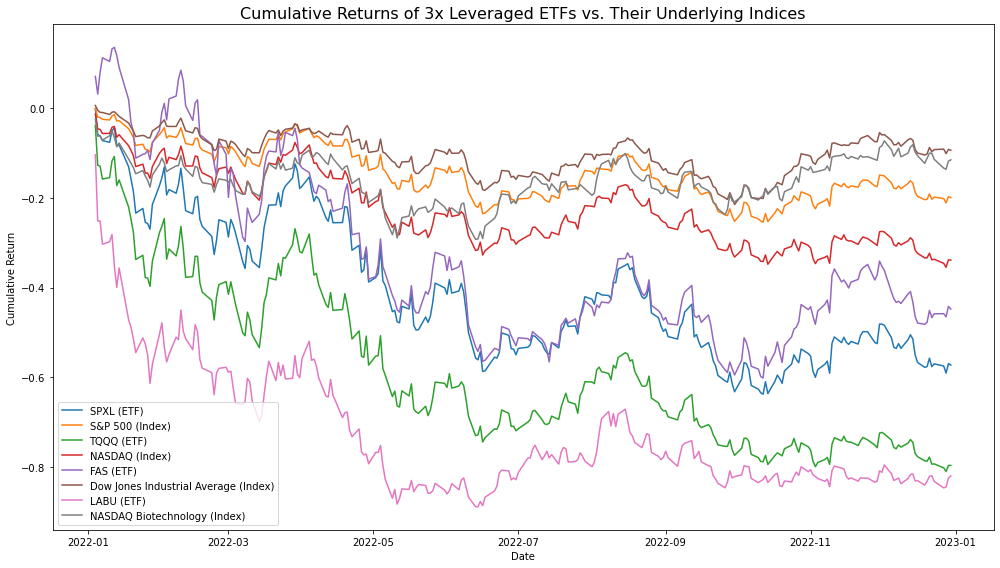

In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ETFs and their underlying indices
etfs = ["SPXL", "TQQQ", "FAS", "LABU"]
indices = ["^GSPC", "^IXIC", "^DJI", "^NBI"]

# Define a dictionary for index names
index_names = {
    "^GSPC": "S&P 500",
    "^IXIC": "NASDAQ",
    "^DJI": "Dow Jones Industrial Average",
    "^NBI": "NASDAQ Biotechnology"
}

# Fetch historical data for the ETFs and indices
data = yf.download(etfs + indices, start="2022-01-01", end="2023-01-01")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

# Split the returns into ETF returns and index returns
etf_cumulative_returns = cumulative_returns[etfs]
index_cumulative_returns = cumulative_returns[indices]

# Plot cumulative returns for each ETF and its corresponding index
plt.figure(figsize=(14, 8))
plt.title('Cumulative Returns of 3x Leveraged ETFs vs. Their Underlying Indices', fontsize=16)

for etf, index in zip(etfs, indices):
    plt.plot(etf_cumulative_returns[etf], label=f'{etf} (ETF)')
    plt.plot(index_cumulative_returns[index], label=f'{index_names[index]} (Index)')

plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.tight_layout()
plt.show()
